# Test the standard deviation of aggregated sequence 

## Aggregate + Correction

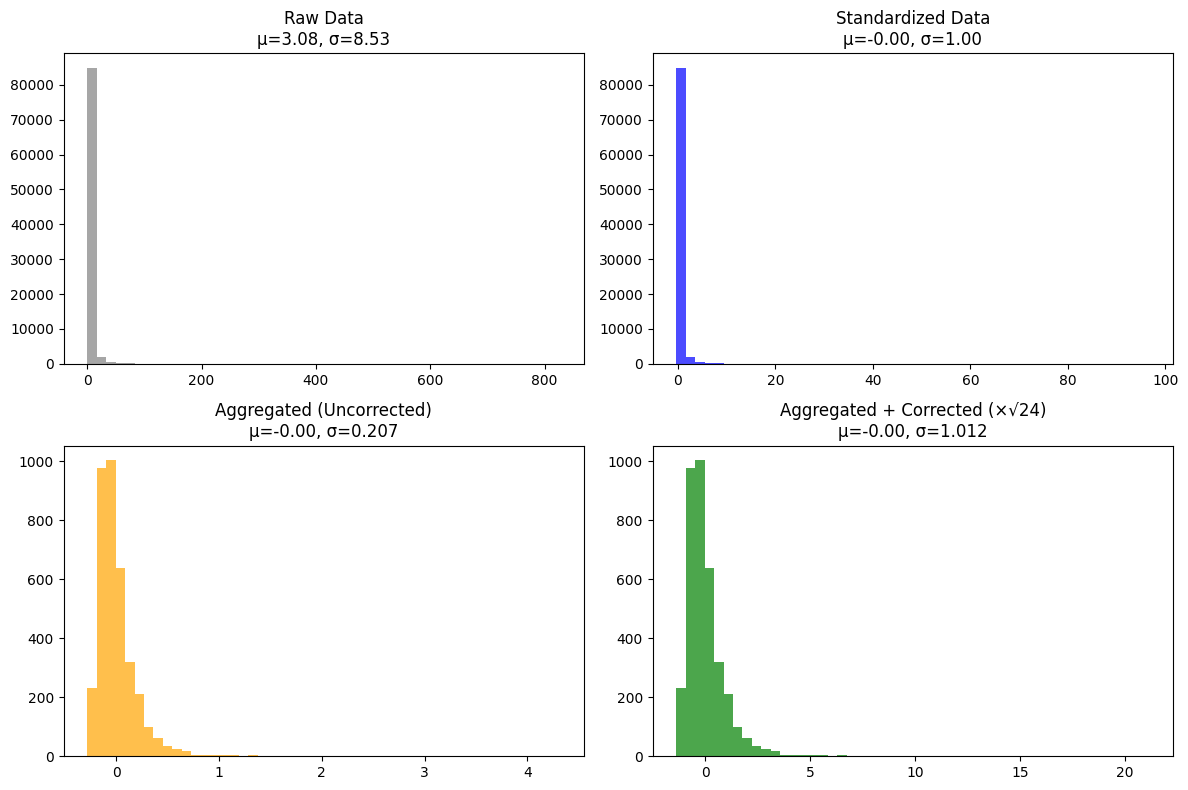

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 原始数据
np.random.seed(42)  # 100
# (1) Generate uniform distrubution sequence
# raw_data = np.random.uniform(low=-3, high=3, size=365*24)  

# (2) Generate standard normal distrubution sequence
# raw_data = np.random.randn(365*24) 

# (3) Generate logarithmic distribution sequence
raw_data = np.random.lognormal(mean=0.0, sigma=1.5, size=365*24*10)

# 标准化
mean_raw = np.mean(raw_data)
std_raw = np.std(raw_data)
standardized_data = (raw_data - mean_raw) / std_raw

# 聚合处理：每 24 个小时聚合成一天
aggregated = standardized_data.reshape(365*10, 24).mean(axis=1)
# 修正标准差：乘以 sqrt(24)
aggregated_corrected = aggregated * np.sqrt(24)


mean_agg = np.mean(aggregated)
std_agg = np.std(aggregated)
mean_corr = np.mean(aggregated_corrected)
std_corr = np.std(aggregated_corrected)

# 绘图
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

# 原始数据分布
axs[0].hist(raw_data, bins=50, color='gray', alpha=0.7)
axs[0].set_title(f"Raw Data\nμ={mean_raw:.2f}, σ={std_raw:.2f}")

# 标准化数据分布
axs[1].hist(standardized_data, bins=50, color='blue', alpha=0.7)
axs[1].set_title(f"Standardized Data\nμ={np.mean(standardized_data):.2f}, σ={np.std(standardized_data):.2f}")

# 聚合未修正数据分布
axs[2].hist(aggregated, bins=50, color='orange', alpha=0.7)
axs[2].set_title(f"Aggregated (Uncorrected)\nμ={mean_agg:.2f}, σ={std_agg:.3f}")

# 聚合修正后数据分布
axs[3].hist(aggregated_corrected, bins=50, color='green', alpha=0.7)
axs[3].set_title(f"Aggregated + Corrected (×√24)\nμ={mean_corr:.2f}, σ={std_corr:.3f}")

plt.tight_layout()
plt.show()


## Aggregate + Standardize

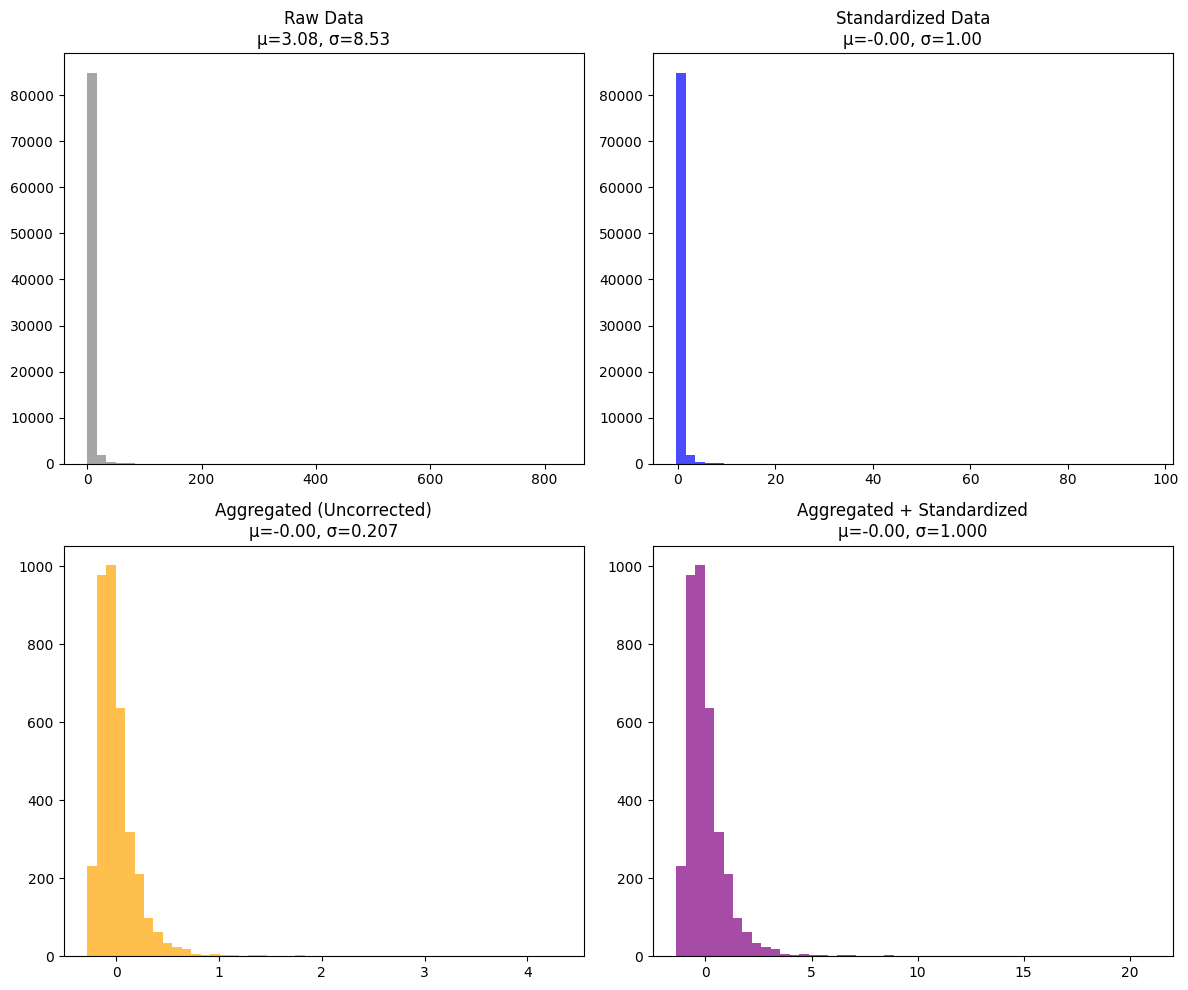

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 原始数据
np.random.seed(42)  # 100
# (1) Generate uniform distrubution sequence
# raw_data = np.random.uniform(low=-3, high=3, size=365*24)  

# (2) Generate standard normal distrubution sequence
# raw_data = np.random.randn(365*24) 

# (3) Generate logarithmic distribution sequence
raw_data = np.random.lognormal(mean=0.0, sigma=1.5, size=365*24*10)

# 2. 标准化原始数据
mean_raw = np.mean(raw_data)
std_raw = np.std(raw_data)
standardized_data = (raw_data - mean_raw) / std_raw

# 3. 全部聚合（每24小时聚为1天），不进行任何修正
aggregated = standardized_data.reshape(365*10, 24).mean(axis=1)

# 4. 对聚合后的数据进行标准化（无修正前提下）
mean_agg = np.mean(aggregated)
std_agg = np.std(aggregated)
aggregated_standardized = (aggregated - mean_agg) / std_agg

# 5. 绘图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Plot 1: 原始数据分布
axs[0].hist(raw_data, bins=50, color='gray', alpha=0.7)
axs[0].set_title(f"Raw Data\nμ={mean_raw:.2f}, σ={std_raw:.2f}")

# Plot 2: 标准化后的原始数据分布
axs[1].hist(standardized_data, bins=50, color='blue', alpha=0.7)
axs[1].set_title(f"Standardized Data\nμ={np.mean(standardized_data):.2f}, σ={np.std(standardized_data):.2f}")

# Plot 3: 聚合后（未修正）数据分布
axs[2].hist(aggregated, bins=50, color='orange', alpha=0.7)
axs[2].set_title(f"Aggregated (Uncorrected)\nμ={mean_agg:.2f}, σ={std_agg:.3f}")

# Plot 4: 聚合后再标准化数据分布
axs[3].hist(aggregated_standardized, bins=50, color='purple', alpha=0.7)
axs[3].set_title(f"Aggregated + Standardized\nμ={np.mean(aggregated_standardized):.2f}, σ={np.std(aggregated_standardized):.3f}")

plt.tight_layout()
plt.show()


In [63]:
np.sqrt(24)


np.float64(4.898979485566356)

In [65]:
1/0.204

4.901960784313726